**BT1 : Nồi cơm điện**

In [35]:
pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [29]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

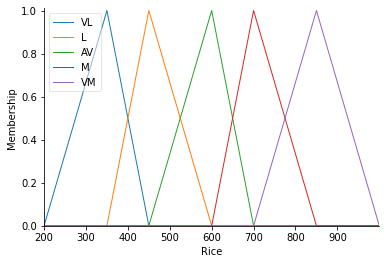

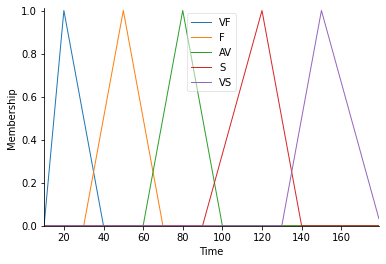

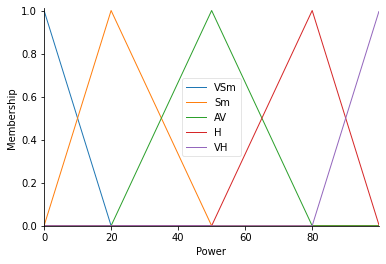

In [41]:
#input
#(a,b,c) = [a,b-1], độ phân giải c
rice = ctrl.Antecedent(np.arange(200,1000,1),'Rice')
time = ctrl.Antecedent(np.arange(10,180,1),'Time')
#output
power = ctrl.Consequent(np.arange(0,100,0.1),'Power')

#.universe = gán giá trị từ Antecedent
rice['VL'] = fuzz.trimf(rice.universe,[200,350,450])
rice['L'] = fuzz.trimf(rice.universe,[350,450,600])
rice['AV'] = fuzz.trimf(rice.universe,[450,600,700])
rice['M'] = fuzz.trimf(rice.universe,[600,700,850])
rice['VM'] = fuzz.trimf(rice.universe,[700,850,1000])

time['VF'] = fuzz.trimf(time.universe,[10,20,40])
time['F'] = fuzz.trimf(time.universe,[30,50,70])
time['AV'] = fuzz.trimf(time.universe,[60,80,100])
time['S'] = fuzz.trimf(time.universe,[90,120,140])
time['VS'] = fuzz.trimf(time.universe,[130,150,180])

power['VSm'] = fuzz.trimf(power.universe,[0,0,20])
power['Sm'] = fuzz.trimf(power.universe,[0,20,50])
power['AV'] = fuzz.trimf(power.universe,[20,50,80])
power['H'] = fuzz.trimf(power.universe,[50,80,100])
power['VH'] = fuzz.trimf(power.universe,[80,100,100])

rice.view()
time.view()
power.view()

In [42]:
rule = []
rule.append(ctrl.Rule(rice['VL'] & time['VF'], power['VSm']))
rule.append(ctrl.Rule(rice['L'] & time['VF'], power['VSm']))
rule.append(ctrl.Rule(rice['AV'] & time['VF'], power['Sm']))
rule.append(ctrl.Rule(rice['M'] & time['VF'], power['AV']))
rule.append(ctrl.Rule(rice['VM'] & time['VF'], power['H']))

rule.append(ctrl.Rule(rice['VL'] & time['F'], power['Sm']))
rule.append(ctrl.Rule(rice['L'] & time['F'], power['Sm']))
rule.append(ctrl.Rule(rice['AV'] & time['F'], power['AV']))
rule.append(ctrl.Rule(rice['M'] & time['F'], power['AV']))
rule.append(ctrl.Rule(rice['VM'] & time['F'], power['H']))

rule.append(ctrl.Rule(rice['VL'] & time['AV'], power['AV']))
rule.append(ctrl.Rule(rice['L'] & time['AV'], power['AV']))
rule.append(ctrl.Rule(rice['AV'] & time['AV'], power['AV']))
rule.append(ctrl.Rule(rice['M'] & time['AV'], power['H']))
rule.append(ctrl.Rule(rice['VM'] & time['AV'], power['H']))

rule.append(ctrl.Rule(rice['VL'] & time['S'], power['AV']))
rule.append(ctrl.Rule(rice['L'] & time['S'], power['H']))
rule.append(ctrl.Rule(rice['AV'] & time['S'], power['H']))
rule.append(ctrl.Rule(rice['M'] & time['S'], power['H']))
rule.append(ctrl.Rule(rice['VM'] & time['S'], power['VH']))

rule.append(ctrl.Rule(rice['VL'] & time['VS'], power['H']))
rule.append(ctrl.Rule(rice['L'] & time['VS'], power['H']))
rule.append(ctrl.Rule(rice['AV'] & time['VS'], power['VH']))
rule.append(ctrl.Rule(rice['M'] & time['VS'], power['VH']))
rule.append(ctrl.Rule(rice['VM'] & time['VS'], power['VH']))

50.000000000000114


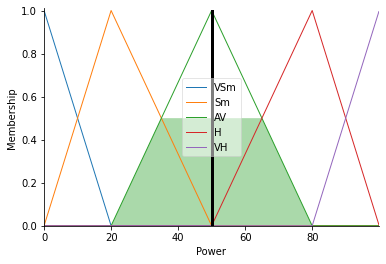

In [44]:
cooker_ctrl = ctrl.ControlSystem(rule)
cooker_simulation = ctrl.ControlSystemSimulation(cooker_ctrl)
cooker_simulation.input['Rice'] = 500
cooker_simulation.input['Time'] = 90
cooker_simulation.compute()
print(cooker_simulation.output['Power'])
power.view(sim=cooker_simulation)